<a href="https://colab.research.google.com/github/Klaudia-777/object_counter/blob/master/Generate_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd /content/gdrive/MyDrive/Praca magisterska/statystyki/

/content/gdrive/MyDrive/Praca magisterska/statystyki


In [ ]:
%ls

 2021_03_27/            2021_03_30/   2021_04_05/
 2021_03_28/            2021_03_31/  'Arkusz kalkulacyjny bez tytułu.gsheet'
 2021_03_29/            2021_04_03/
 2021_03_29_full_day/   2021_04_04/


In [ ]:
# Choose appropriate <date>/<camera> folder
%cd 2021_03_30/rynek2/

/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_30/rynek2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def adjust_columns(df):
  df["Object Max Idle"] = round(pd.to_numeric((df["Object Max Idle"]) * 5 / 25) / 60, 2)
  df["Object First Frame"] = pd.to_numeric(df["Object First Frame"]) / 25
  df["Object Last Frame"] = pd.to_numeric(df["Object Last Frame"]) / 25
  df

In [ ]:
!ls

playlist_20210330T060000+0200.csv
playlist_20210330T060000+0200_summary.txt
playlist_20210330T070001+0200.csv
playlist_20210330T070001+0200_summary.txt
playlist_20210330T080000+0200.csv
playlist_20210330T080000+0200_summary.txt
playlist_20210330T090001+0200.csv
playlist_20210330T090001+0200_summary.txt
playlist_20210330T100001+0200.csv
playlist_20210330T100001+0200_summary.txt
playlist_20210330T110000+0200.csv
playlist_20210330T110000+0200_summary.txt


In [ ]:
# Read example file
df = pd.read_csv (r'playlist_20210330T060000+0200.csv')
adjust_columns(df)


# Ile pieszych, rowerzystów, pojazdów wykryto w całym filmie?

In [ ]:
import os

def create_files_array(folder):
  files_array=[]
  for file in sorted(os.listdir(folder)):
    if file.endswith(".csv"):
      files_array.append(file)
  return files_array

In [ ]:
def create_hours_array(files_array):
  hours_array=[]
  for file in files_array:
    file_split = file.split('T')[1]
    filename = file_split[0:2]+":"+file_split[2:4]
    hours_array.append(filename)
  return hours_array  

In [ ]:
def create_dfs(files_array):
  df_array=[]
  for file in files_array:
    df = pd.read_csv(file)
    adjust_columns(df)
    df
    df_array.append(df)
  return df_array

In [ ]:
def bar_plot(dfs,times):
  persons = []
  bicycyle = []
  cars = []
  for df in dfs:
    grouped = df[["Class", "Object ID"]].groupby(["Class"]).count().reset_index()["Object ID"]
    if len(grouped) >= 1:
      persons.append(grouped[0])
    else:
      persons.append(0)
    if len(grouped) >= 2:
      bicycyle.append(grouped[1])
    else:
      bicycyle.append(0)
    if len(grouped) >= 3:
      cars.append(grouped[2])
    else:
      cars.append(0)
  new_df = pd.DataFrame({'persons': persons,
                   'bicycles': bicycyle, "cars": cars}, index=times)
  ax = new_df.plot.bar(rot=0, figsize=(15,15))
  ax.set_title('Podsumowanie detekcji', fontsize=20)
  ax.set_xlabel('kolejne godziny', fontsize=15)
  ax.set_ylabel('liczba wykrytych obiektów', fontsize=15)
  L=plt.legend(prop={"size":15})
  L.get_texts()[0].set_text('piesi')
  L.get_texts()[1].set_text('rowerzyści')
  L.get_texts()[2].set_text('pojazdy')
  

/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_29_full_day/rynek2


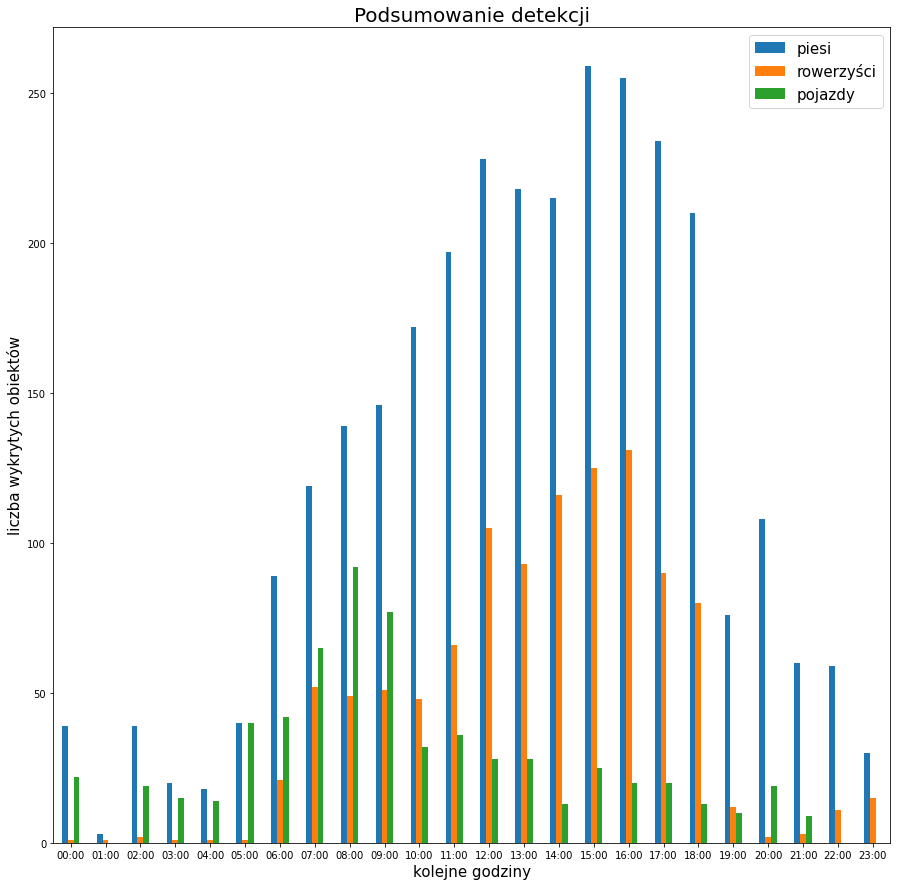

In [ ]:
# rynek2

%cd /content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_29_full_day/rynek2/
files_array = create_files_array("/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_29_full_day/rynek2/")
bar_plot(create_dfs(files_array), create_hours_array(files_array))


/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_29_full_day/grodzka_rynek


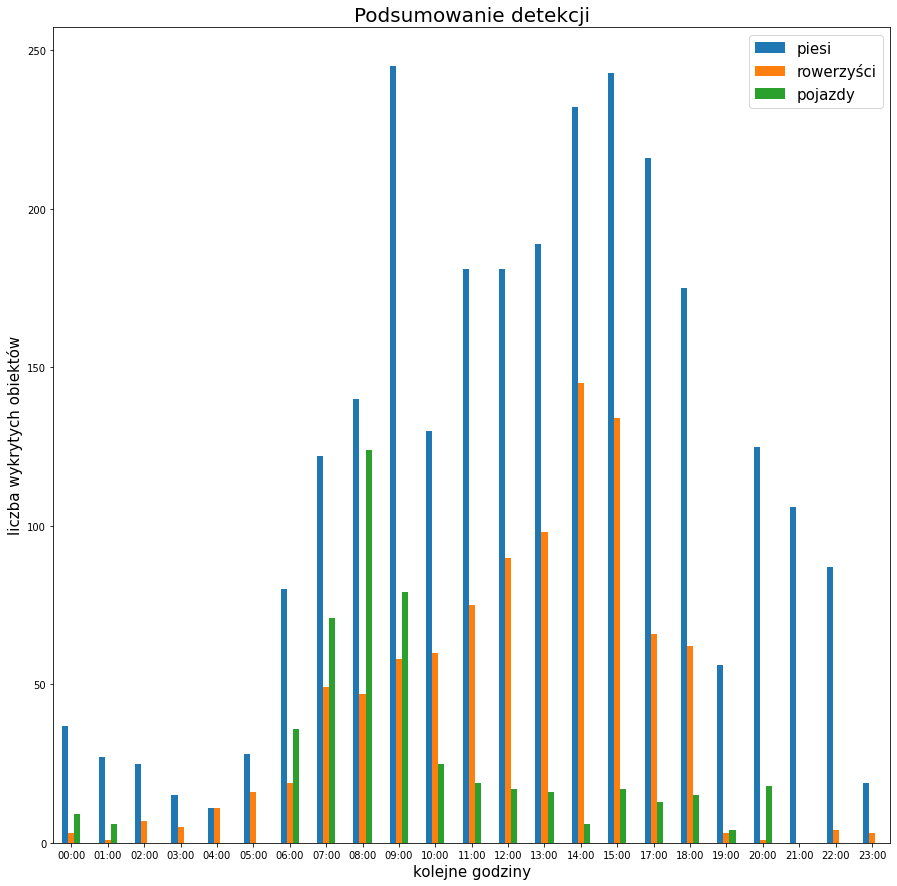

In [ ]:
# grodzka_rynek

%cd /content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_29_full_day/grodzka_rynek/
files_array = create_files_array("/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_29_full_day/grodzka_rynek/")
bar_plot(create_dfs(files_array), create_hours_array(files_array))

/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_29_full_day/grodzka_senacki


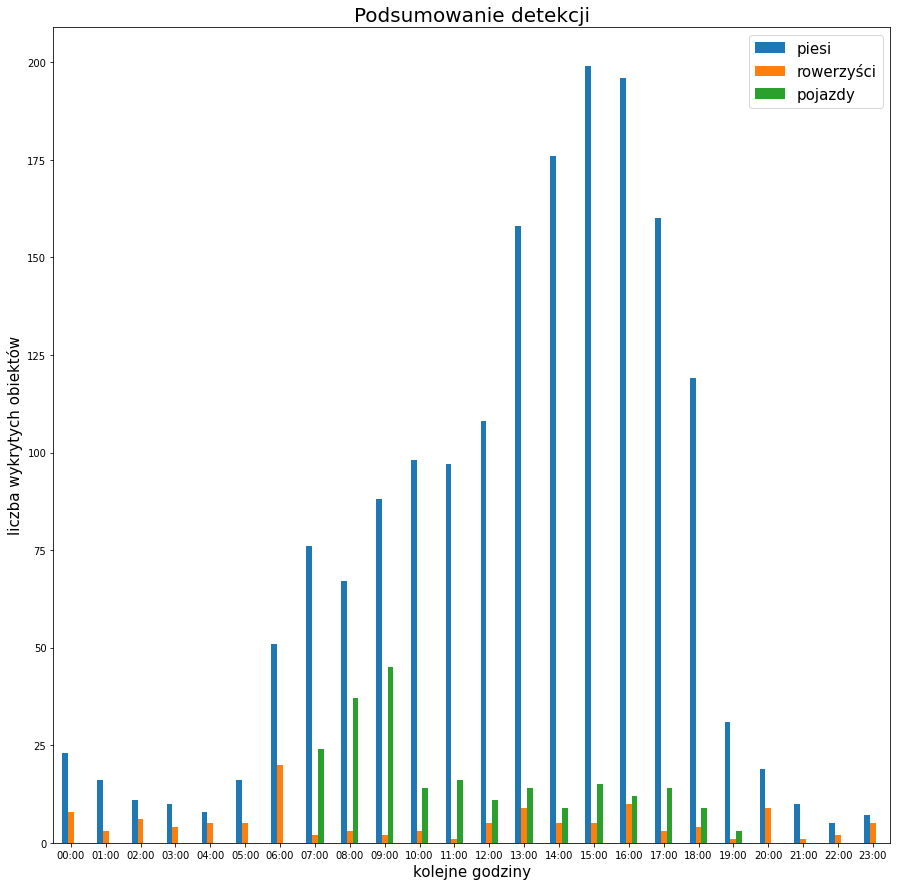

In [ ]:
# grodzka_senacki

%cd /content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_29_full_day/grodzka_senacki/
files_array = create_files_array("/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_29_full_day/grodzka_senacki/")
bar_plot(create_dfs(files_array), create_hours_array(files_array))

# Ile pieszych, rowerzystów, pojazdów wjechało (pojawiło się w obszarze) w danym interwale czasu (interwał co 5 lub 15 minut)?




In [ ]:
def filter_by_appear_time(df, start_time, end_time, class_num):
  return df.loc[(df['Object First Frame'] >= start_time * 60 ) & (df['Object First Frame'] <= end_time * 60) & (df['Class'] == class_num)]


In [ ]:
%cd /content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_30/grodzka_rynek/
files_array = create_files_array("/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_30/grodzka_rynek/")
files_array

/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_30/grodzka_rynek


['livestream_20210330T060000+0200.csv',
 'livestream_20210330T070001+0200.csv',
 'livestream_20210330T080000+0200.csv',
 'livestream_20210330T090001+0200.csv',
 'livestream_20210330T100001+0200.csv',
 'livestream_20210330T110000+0200.csv']

In [ ]:
hours_array=create_hours_array(files_array)
hours_array

['06:00', '07:00', '08:00', '09:00', '10:00', '11:00']

In [ ]:
def filter_by_frame(df, frame):
  return df.loc[(df['Object First Frame'] <= frame) & (df['Object Last Frame'] >= frame) & (df['Object Last Frame'] - df['Object First Frame'] >= 2 )  & (df['Object Last Frame'] - df['Object First Frame'] <= 1200 )]
  # return df

filter_by_claas(filter_by_frame(create_dfs(files_array)[3], 962),0)

,Object ID,Class,Object First Frame,Object Last Frame,Object Max Idle
102,336,0,170.0,962.4,0.0
105,347,0,940.2,966.8,0.0
106,351,0,932.2,982.2,0.0
107,354,0,51.4,1004.2,0.0
108,355,0,938.6,995.8,0.0
111,363,0,843.8,1063.2,0.0
113,366,0,888.6,1021.2,0.0
116,371,0,955.2,1049.8,0.0
117,372,0,194.6,1050.6,0.0
119,387,0,212.4,1099.2,0.0


In [ ]:
filter_by_claas(create_dfs(files_array)[],962)

SyntaxError: ignored

In [ ]:
def filter_by_claas(df, class_number):
  return df.loc[(df['Class'] == class_number)]

In [ ]:
def create_time_labels(dfs, times):
  labels = []
  counter = 0
  for df in dfs:
    for (start, end) in times:
      hour=hours_array[counter][0:3]
      end=str(end)
      if (end == "60"):
        end = "00"
        if (hour[0]=="0"):
          till_hour=hour[0]+str(int(hour[1])+1)+hour[2]
          labels.append( hour + str(start) + "-" + till_hour + end)
        else:  
          till_hour=str(int(hour[0:2])+1)+hour[2]
          labels.append( hour + str(start) + "-" + till_hour + end)
      else:
        labels.append( hour + str(start) + "-" + hour + end)
    counter+=1
  return labels

0:451
15:1638
30:1902
45:2983
0:895
15:900
30:2435
45:2870
0:667
15:1667
30:2392
45:2724
0:690
15:997
30:1800
45:0
0:650
15:1175
30:2565
45:2917
0:645
15:1698
30:2535
45:3117
[7, 7, 4, 6, 17, 17, 10, 14, 14, 23, 41, 43, 19, 18, 14, 0, 7, 7, 15, 19, 8, 8, 17, 20]


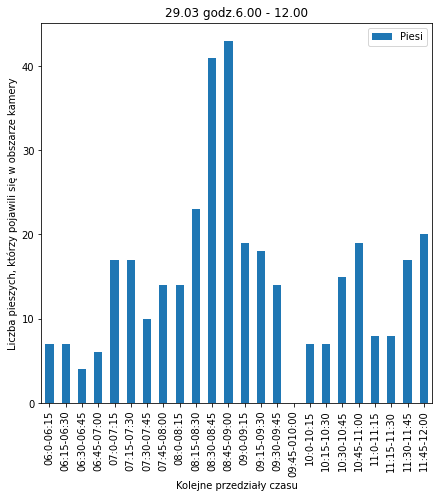

In [ ]:
#max detected in time window

def max_detected(dfs, claas, times,title,ylabel,legend, color):
  counts = []
  labels = create_time_labels(dfs,times)
  max_counts=[]
  for df in dfs:
    df=filter_by_claas(df,claas)
    for (start, end) in times:
      start_frame=start*60
      end_frame=end*60
      max_count=0
      max_frame = 0
      for frame in range(start_frame, end_frame):
          filtered = filter_by_frame(df, frame)
          count = filtered.index
          # count=len(df.loc[(df['Object First Frame'] <= frame) & (df['Object Last Frame'] >= frame) & (df['Object Last Frame'] - df['Object First Frame'] > 20)])
          if (len(count)>max_count):
            max_count=len(count)
            max_frame = frame
      max_counts.append(max_count)
      print(str(start) + ":" + str(max_frame))
  print(max_counts)
  new_df = pd.DataFrame({'Objects': max_counts}, index=labels)
  ax = new_df.plot.bar(rot=0,  title=title,figsize=(7,7), color=color)
  ax.set(xlabel="Kolejne przedziały czasu", ylabel=ylabel)
  plt.legend([legend]);
  plt.xticks(rotation=90)

# create_dfs(files_array)
# max_detected(create_dfs(files_array), 2, [(0,15),(15,30),(30,45),(45,60)],'29.03 godz.6.00 - 12.00', "Liczba pojazdów, które pojawiy się w obszarze kamery", "Pojazdy samochodowe", 'green')
max_detected(create_dfs(files_array), 0, [(0,15),(15,30),(30,45),(45,60)],'29.03 godz.6.00 - 12.00', "Liczba pieszych, którzy pojawili się w obszarze kamery", "Piesi", 'tab:blue')
# max_detected(create_dfs(files_array), 1, [(0,15),(15,30),(30,45),(45,60)],'29.03 godz.6.00 - 12.00', "Liczba rowerzystów, którzy pojawili się w obszarze kamery", "Rowerzyści", 'orange')

In [ ]:
frame=1345
filtered = filter_by_frame(df, frame)
count = filtered.index
print(len(count))
print(len(df.loc[(df['Object First Frame'] <= frame) & (df['Object Last Frame'] >= frame)]))

30
30


In [ ]:
def class_in_bar_plot(dfs,clazz,times,title,ylabel,legend, color):
  counts = []
  labels = []
  counter=0
  for df in dfs:
    for (start, end) in times:
      filtered = filter_by_appear_time(df, start, end, clazz)
      count = filtered[["Class", "Object ID"]].groupby(["Class"]).count().reset_index()["Object ID"]
      if (len(count)> 0):
        counts.append(count[0])
      else:
        if (len(counts) > 0):
          counts.append(counts[-1]-2)
        else:
          counts.append(0)
      hour=hours_array[counter][0:3]
      end=str(end)
      start=str(start)
      if (start=="0"):
        start="00"
      if (end == "60"):
        end = "00"
        if (hour[0]=="0"):
          till_hour=hour[0]+str(int(hour[1])+1)+hour[2]
          labels.append( hour + str(start) + "-" + till_hour + end)
        else:  
          till_hour=str(int(hour[0:2])+1)+hour[2]
          labels.append( hour + str(start) + "-" + till_hour + end)
      else:
        labels.append( hour + str(start) + "-" + hour + end)
    new_df = pd.DataFrame({'Objects': counts}, index=labels)
    counter+=1
  ax = new_df.plot.bar(rot=0,  title=title,figsize=(7,7), color=color)
  ax.set(xlabel="Kolejne przedziały czasu", ylabel=ylabel)
  plt.legend([legend]);
  plt.xticks(rotation=90)

max_detected(create_dfs(files_array), 2, [(0,15),(15,30),(30,45),(45,60)],'30.03 godz.6.00 - 12.00', "Liczba pojazdów, które pojawiy się w obszarze kamery", "Pojazdy samochodowe", 'green')
max_detected(create_dfs(files_array), 0, [(0,15),(15,30),(30,45),(45,60)],'30.03 godz.6.00 - 12.00', "Liczba pieszych, którzy pojawili się w obszarze kamery", "Piesi", 'tab:blue')
max_detected(create_dfs(files_array), 1, [(0,15),(15,30),(30,45),(45,60)],'30.03 godz.6.00 - 12.00', "Liczba rowerzystów, którzy pojawili się w obszarze kamery", "Rowerzyści", 'orange')

TypeError: ignored

In [ ]:
def create_files_mean_calculation(folders):
  mean_calc_files_array=[]
  for file in folders:
    mean_calc_files_array.append(create_files_array(file))
  return mean_calc_files_array

In [ ]:
files_mean_calc=[ "/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_29/rynek2/","/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_30/rynek2/", "/content/gdrive/MyDrive/Praca magisterska/statystyki/2021_03_31/rynek2/"]
files_for_mean_calculation_array=create_files_mean_calculation(files_mean_calc)
files_for_mean_calculation_array

[['playlist_20210329T060000+0200.csv',
  'playlist_20210329T070001+0200.csv',
  'playlist_20210329T080000+0200.csv',
  'playlist_20210329T090001+0200.csv',
  'playlist_20210329T100000+0200.csv',
  'playlist_20210329T110001+0200.csv'],
 ['playlist_20210330T060000+0200.csv',
  'playlist_20210330T070001+0200.csv',
  'playlist_20210330T080000+0200.csv',
  'playlist_20210330T090001+0200.csv',
  'playlist_20210330T100001+0200.csv',
  'playlist_20210330T110000+0200.csv'],
 ['playlist_20210403T060000+0200.csv',
  'playlist_20210403T070001+0200.csv',
  'playlist_20210403T080000+0200.csv',
  'playlist_20210403T090001+0200.csv',
  'playlist_20210403T100000+0200.csv',
  'playlist_20210403T110001+0200.csv']]

In [ ]:
import os

def create_dfs_mean_calculation(files_for_mean_calculation_array,files_mean_calc):
  mean_calc_dfs_array=[]
  change_directory_counter=0
  for file_array in files_for_mean_calculation_array:
    os.chdir(files_mean_calc[change_directory_counter])
    mean_calc_dfs_array.append(create_dfs(file_array))
    change_directory_counter+=1
  return mean_calc_dfs_array

In [ ]:
mean_calc_dfs_array=create_dfs_mean_calculation(files_for_mean_calculation_array,files_mean_calc)

In [ ]:
def class_in(dfs,clazz,times):
  counts = []
  labels = []
  counter=0
  for df in dfs:
    for (start, end) in times:
      filtered = filter_by_appear_time(df, start, end, clazz)
      count = filtered[["Class", "Object ID"]].groupby(["Class"]).count().reset_index()["Object ID"]
      if (len(count)> 0):
        counts.append(count[0])
      else:
        counts.append(0)
      hour=hours_array[counter][0:3]
      end=str(end)
      if (end == "60"):
        end = "00"
        if (hour[0]=="0"):
          till_hour=hour[0]+str(int(hour[1])+1)+hour[2]
          labels.append( hour + str(start) + "-" + till_hour + end)
        else:  
          till_hour=str(int(hour[0:2])+1)+hour[2]
          labels.append( hour + str(start) + "-" + till_hour + end)
      else:
        labels.append( hour + str(start) + "-" + hour + end)
    counter+=1
  return counts
  class_in(create_dfs(files_array), 2, [(0,15),(15,30),(30,45),(45,60)])


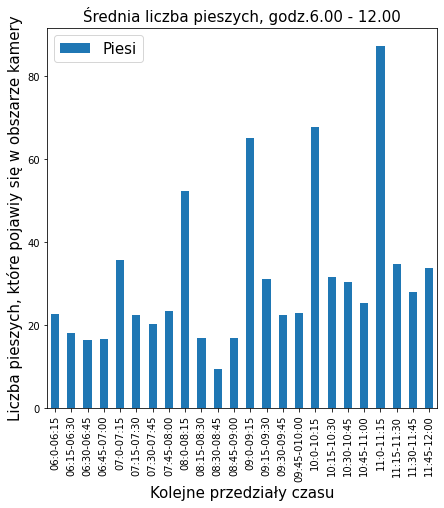

In [ ]:
def create_time_labels(dfs, times):
  labels = []
  counter = 0
  for df in dfs:
    for (start, end) in times:
      hour=hours_array[counter][0:3]
      end=str(end)
      if (end == "60"):
        end = "00"
        if (hour[0]=="0"):
          till_hour=hour[0]+str(int(hour[1])+1)+hour[2]
          labels.append( hour + str(start) + "-" + till_hour + end)
        else:  
          till_hour=str(int(hour[0:2])+1)+hour[2]
          labels.append( hour + str(start) + "-" + till_hour + end)
      else:
        labels.append( hour + str(start) + "-" + hour + end)
    counter+=1
  return labels

def class_in_mean_plot(dfs, clazz, times, title,ylabel,legend):
  counts = []
  labels = create_time_labels(dfs[0], times)
  for df in dfs:
    c = class_in(df, clazz, times)
    counts.append(c)
  means = []
  for count_arr in counts:
    for i in range(len(count_arr)):
      if len(means) == i:
        means.append(count_arr[i])
      else:
        means[i] += count_arr[i]
  means = list(map(lambda x: x / len(counts), means))
  new_df = pd.DataFrame({'Objects': means}, index=labels)
  ax = new_df.plot.bar(rot=0,figsize=(7,7))
  ax.set_title(title, fontsize=15)
  ax.set_xlabel("Kolejne przedziały czasu", fontsize=15)
  ax.set_ylabel(ylabel, fontsize=15)
  plt.legend([legend],prop={"size":15});
  # L=plt.legend(prop={"size":13})
  plt.xticks(rotation=90)
  

class_in_mean_plot(mean_calc_dfs_array,  0, [(0,15),(15,30),(30,45),(45,60)], 'Średnia liczba pieszych, godz.6.00 - 12.00', "Liczba pieszych, które pojawiy się w obszarze kamery", "Piesi")

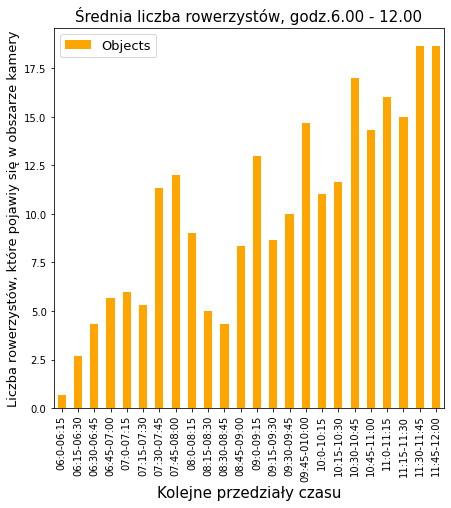

In [ ]:
class_in_mean_plot(mean_calc_dfs_array,  1, [(0,15),(15,30),(30,45),(45,60)], 'Średnia liczba rowerzystów, godz.6.00 - 12.00', "Liczba rowerzystów, które pojawiy się w obszarze kamery", "Rowerzyści", 'orange')

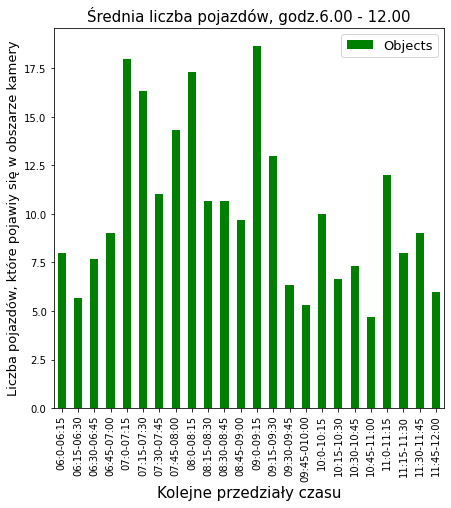

In [ ]:
class_in_mean_plot(mean_calc_dfs_array,  2, [(0,15),(15,30),(30,45),(45,60)], 'Średnia liczba pojazdów, godz.6.00 - 12.00', "Liczba pojazdów, które pojawiy się w obszarze kamery", "Pojazdy", 'green')

# Ile znajdowało się maksymalnie jednocześnie w tej przestrzeni kamery (interwał 5 minut), przy czym podział na pojazdy jadące i nieruchome (ile stało na jakimś miejscu postojowym maksymalnie w tym okresie czasu)? 

In [ ]:
def adjust_columnss(df):
  df["Object Max Idle"] = round(pd.to_numeric((df["Object Max Idle"]) * 5 / 25) / 60)
  df["Object First Frame"] = pd.to_numeric(df["Object First Frame"]) / 25
  df["Object Last Frame"] = pd.to_numeric(df["Object Last Frame"]) / 25
  df

In [ ]:
def create_df(file):
  df = pd.read_csv (file)
  adjust_columnss(df)
  return df

In [ ]:
def filter_by_class(df, class_number):
  return df.loc[(df['Class'] == class_number) & (df['Object Max Idle'] > 1.00) & (df['Idle procent'] > 1.00)]

In [ ]:
def filter_by_exist_time(df, start_time, end_time):
  return df.loc[(df['Object Last Frame'] >= start_time * 60) & (df['Object First Frame'] <= end_time * 60)]

In [ ]:
def filter_idle_vehicles(df, start_time, end_time, title, bins):
  df=df.loc[(df['Object Last Frame'] >= start_time * 60) & (df['Object First Frame'] <= end_time * 60) & (df['Object Max Idle'] >= 1 )  & (df['Object Max Idle'] < 60 )]
  data = filter_by_exist_time(df, start_time, end_time).loc[df['Class'] == 2]['Object Max Idle']
  ax = data.plot(kind='hist', grid=True, bins=bins)
  ax.set_title(title, fontsize=18)  
  ax.set_xlabel("Czasy postoju pojazdów [min]", fontsize=15)
  ax.set_ylabel(ylabel='Liczba pojazdów', fontsize=15)
  ax.xaxis.set_label_coords(0.5,-0.15)

In [ ]:
def filter_idle(df, start_time, end_time):
  return df.loc[(df['Object Last Frame'] >= start_time * 60) & (df['Object First Frame'] <= end_time * 60) & (df['Object Max Idle'] > 5 )  & (df['Object Max Idle'] < 60 )]


In [ ]:
def insert_every_two_chars(char,string):
  return char.join(a+b for a,b in zip(string[::2], string[1::2]))

In [ ]:
def extract_day(file):
  string_day = file.split('_')[1][2:8]
  splitted_string = insert_every_two_chars('-', string_day)
  string_array=splitted_string.split('-')
  return string_array[2] + '-' + string_array[1] + '-20' + string_array[0]

In [ ]:
def extract_hour(file):
  string_hour = file.split('T')[1][0:4]
  return insert_every_two_chars(':', string_hour)

In [ ]:
%cd '/content/gdrive/My Drive/Praca magisterska/statystyki/2021_03_29/grodzka_rynek'
%pwd

/content/gdrive/My Drive/Praca magisterska/statystyki/2021_03_29/grodzka_rynek


'/content/gdrive/My Drive/Praca magisterska/statystyki/2021_03_29/grodzka_rynek'

In [ ]:
%ls | grep csv

livestream_20210329T060000+0200.csv
livestream_20210329T070001+0200.csv
livestream_20210329T080000+0200.csv
livestream_20210329T090001+0200.csv
livestream_20210329T100000+0200.csv
livestream_20210329T110001+0200.csv


In [ ]:
file = 'playlist_20210329T070001+0200.csv'
print(file)
print(extract_day(file))
print(extract_hour(file))

playlist_20210329T070001+0200.csv
29-03-2021
07:00


In [ ]:
file = 'livestream_20210329T070001+0200.csv'
df = create_df(file)
filter_by_exist_time(df,0,60).loc[(df['Class'] == 2) & (df['Object Max Idle'] >= 1)]['Object Max Idle']

15     3.0
29     6.0
53     7.0
58     1.0
65    24.0
Name: Object Max Idle, dtype: float64

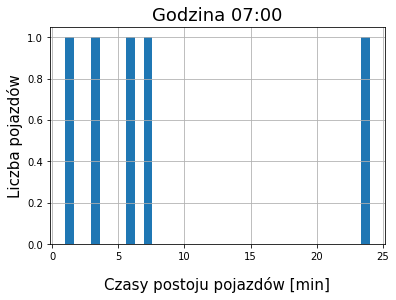

In [ ]:
file = 'livestream_20210329T070001+0200.csv'
df_7 = create_df(file)
filter_idle_vehicles(df_7, 0, 60, "Godzina "+ extract_hour(file), 35)


In [ ]:
file = 'livestream_20210329T100000+0200.csv'
df_7 = create_df(file)
filter_idle(df_7, 0, 60)

,Object ID,Class,Object First Frame,Object Last Frame,Object Max Idle
110,536,2,2748.0,3253.4,8.37


In [ ]:
filter_by_exist_time(df, 0, 30)

,Object ID,Class,Object First Frame,Object Last Frame,Object Max Idle
0,80,2,465.8,485.6,0.00
1,104,2,607.6,609.8,0.00
2,112,2,677.0,680.4,0.01
3,125,2,750.6,754.4,0.00
4,130,2,773.8,780.8,0.04
5,141,0,874.0,926.2,0.00
6,168,2,1022.6,1030.8,0.00
7,178,0,1089.8,1091.6,0.00
8,186,2,1128.8,1140.2,0.08
9,209,2,1247.8,1256.8,0.00


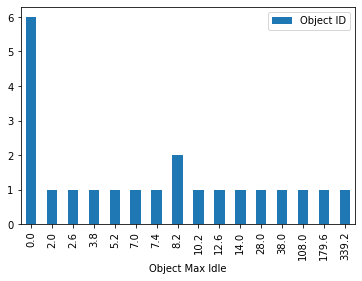

In [ ]:
df_filter_by_exist_time=filter_by_exist_time(df, 0, 30)
df_filter_by_exist_time=df_filter_by_exist_time.loc[df_filter_by_exist_time["Class"]==2]
df_filter_by_exist_time[["Object ID", "Object Max Idle"]].groupby(["Object Max Idle"]).count().reset_index().plot(kind = "bar", x="Object Max Idle")

# Ile % czasu był pojazd zaparkowany podczas, kiedy był widoczny w oku kamery 

In [ ]:
def adjust_columns_1(df):
  df["Object Max Idle"] = round(pd.to_numeric((df["Object Max Idle"]) * 5 / 25) / 60, 2)  
  df["Object First Frame"] = round(pd.to_numeric((df["Object First Frame"]) / 25) /60, 2)
  df["Object Last Frame"] = round(pd.to_numeric((df["Object Last Frame"]) / 25)/ 60, 2)
  df

In [ ]:
def create_df_1(file):
  df = pd.read_csv (file)
  adjust_columns_1(df)
  return df

In [ ]:
file = 'livestream_20210329T100000+0200.csv'
df_7 = create_df_1(file)


df_7["Idle procent"] = round(100 * df_7["Object Max Idle"] / (df_7["Object Last Frame"] - df_7["Object First Frame"]), 2)
filter_by_class(df_7, 2)


,Object ID,Class,Object First Frame,Object Last Frame,Object Max Idle,Idle procent
110,536,2,45.8,54.22,8.37,99.41
